# <h1>Homework 1 - Practical Deep Learning Sys. Perf. - Chandan Suri - CS4090</h1>

<h2>Problem 1 - Linear Separability</h2>

<h2> Solution 1.1 </h2>

### First we will be plotting the points for two features x1 and x2

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scatter_plots_and_hyperplanes(c1_x_coord, c1_y_coord,\
                                       c2_x_coord, c2_y_coord,\
                                       legend_pos,\
                                       hyperplane_x_coord = None, 
                                       hyperplane_y_coord = None):
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.scatter(c1_x_coord, c1_y_coord, s = 20, c = 'r', 
                 marker = 'o', label = 'c1')
    axes.scatter(c2_x_coord, c2_y_coord, s = 20, c = 'b', 
                 marker = 'o', label = 'c2')
    if hyperplane_x_coord is not None \
        and hyperplane_y_coord is not None:
        axes.plot(hyperplane_y_coord, hyperplane_x_coord, 
                  c = 'g', label='hyperplane')
    plt.legend(loc = legend_pos)
    plt.show()
    
    return

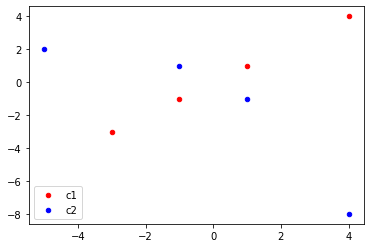

In [50]:
x1_c1 = [-1, 1, -3, 4]
x2_c1 = [-1, 1, -3, 4]
x1_c2 = [-1, 1, -5, 4]
x2_c2 = [1, -1, 2, -8]

plot_scatter_plots_and_hyperplanes(x1_c1, x2_c1, 
                                   x1_c2, x2_c2, 'lower left')

### Explanation

<br>
<div style='color:blue'>
As seen above in the plot, it doesn't look like this will be linearly separable so, we won't be able to use a linear classifier to classify the features. As the features for one class c1 goes from left to right in a single line represented by the equation x1_c1 = x2_c1 (analogous to y = x) and the features for class c2 seems like a curved function having a negative slope. As there is no line in the space that can separate these features, so, it's not linearly separable.
</div>

<h2> Solution 1.2 </h2>

### Explanation
<br>
<div style="color: blue">
<p>The features for class c1 basically lies on a straight line and the features for class c2 lies on a curve. As we need to transform these features in 1-dimension, it's viable to do make them lie on a straight line that corresponds to the line defined by the class c1.</p>
<p>So, the equation of the line for the class c1's features looks like y = x as all the points have equal corresponding x and y co-ordinates.</p>
<p>So, to transform the features x1 and x2 for the classes c1 and c2, we will take function to be z = mod(x1 - x2) to bring them in a single dimension thus, transforming them into a 1-dimensional representation z.</p>
</div>

In [51]:
x1_c1.extend(x1_c2)
x2_c1.extend(x2_c2)
x_1 = list(x1_c1)
x_2 = list(x2_c1)
z = [abs(x1 - x2) for x1, x2 in zip(x_1, x_2)]
print("Z-Representation of features x1, x2 for the classes c1, c2 are: ",z)

Z-Representation of features x1, x2 for the classes c1, c2 are:  [0, 0, 0, 0, 2, 2, 7, 12]


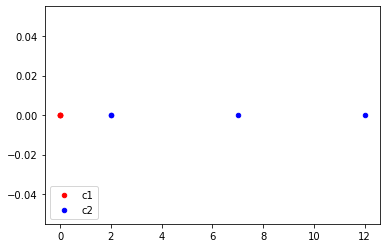

In [52]:
plot_scatter_plots_and_hyperplanes(z[:4], np.zeros_like(z[:4]), 
                                   z[4:], np.zeros_like(z[4:]), 
                                   'lower left')

<h2> Solution 1.3 </h2>

### Now, this looks like something that's linearly separable. Now, we can draw a hyperplane to separate these classes!

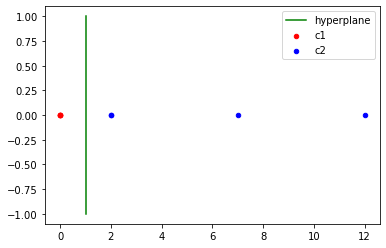

In [53]:
plot_scatter_plots_and_hyperplanes(z[:4], np.zeros_like(z[:4]), 
                                   z[4:], np.zeros_like(z[4:]),
                                   'upper right', [-1, 1], [1, 1])

<div style="color:blue">
The hyperplane separating the classes is shown above in the plot represented by a straight line perpendicular to the x axis! (green line shown in the plot above)
</div>

<h2> Solution 1.4 </h2>

<div style="color:blue">
<p>That's really significant for classification problems because: </p>
<ol>
    <li>It increases the quality and interpretability of the results of the classification problems. It's much more easier to interpret the results of a classifier after a non-linear transformation is applied where applicable.</li>
    <li>It increases the ability to create or develop simpler, more robust, translational models. To get a good accuracy for a classification problem doesn't always necessarily mean to have some complex model fit the data but sometimes a simpler model achieving a great accuracy can help to increase the interpretability of the model thus, making the process easier and achieve good results at the same time.</li>
    <li>Also, the task of analysis of the model and the results becomes easier! And, we can also reduce some computational power using the non-linear transformation!</li>
</ol>
</div>

<h2> Problem 2 - Bias Variance Tradeoff, Regularization </h2>

<h2> Solution 2.1 </h2>

<div style="color:blue">
    Before we dive into the proof, let's first establish what all the parameters mean:<br>
    Expected E[x]: This mainly means the average of all the values of x over a dataset. So, whatever is writting inside the braces of E, the average of all those values are taken out by adding them up and then dividing that by the number of the values of x or whatever is written inside the braces of E, (E[something]).<br>
    Estimator Bias: It's a metric that tries to assess the average accuracy of an estimator g(x) at approximating a target function f(x). <br> Precisely, the bias describes how much the average estimator fit over many datasets deviates from the values of the actual underlying target function f(x). It's formally defined as: <br>
    $$
        Bias = E[g(x)] - f(x) \tag{1}      
    $$<br>
    Estimator Variance: This tries to capture the average consistency of an estimator when it is fit to multiple datasets. Essentially, the variance is the expected (average) squared difference between any single dataset-dependent estimate of g(x) and the average value of g(x) estimated over all the datasets under consideration, E(g(x)). It's formally defined as:<br>
    $$
        Variance  = E[(g(x) - E[g(x)])^2] \tag{2}
    $$<br>
    Now, let's dive in the proof!<br>
    Let's start with some assumptions:<br>
    Let $y(x) = f(x) + \epsilon$ be the true relationship and g(x) be the model predicted value of y(x) so, basically it's an estimator. For a given estimator g(x) and x-y pairs of dataset, the MSE or the expected prediction error us given by:<br>
    $$
        MSE = E[(y(x) - g(x))^2] = E[(f(x) + \epsilon - g(x))^2] \tag{3}
    $$<br>
    Let's expand the equation 3,<br>
    $$
        E[(y(x) - g(x))^2] = E[y(x)^2 - 2y(x)g(x) + g(x)^2]
    $$<br>
    We can distribute the expected E term across for all the terms separately now as taking out the mean of the whole thing will be equal to taking out the mean of its components and then adding/substracting them up based on the signs in the equations above,<br>
    $$
        = E[y(x)^2] - 2E[y(x)g(x)] + E[g(x)^2] \tag{4}
    $$<br><br>
    Now, let's take a slight detour and explore a Lemma that will help us solve the equation 4 above more,<br>
    For expected value of squared random variable, we want to show the following relationship,
    $$
        E[X^2] = E[(X - E[X])^2] + E[X]^2 \tag{5}
    $$<br>
    Let's expand the first expression on the right hand side of the equation above,
    $$
        E[(X - E[X])^2] = E[X^2 - 2XE[X] + E[X]^2] 
    $$
    $$
        E[(X - E[X])^2] = E[X^2] - 2E[X]E[E[X]] + E[E[X]^2] \tag{6}
    $$<br>
    If we not that E[X] is a constant then E[E[X]] is also a constant, namely E[X]. Taking this into account, equation 6 above simplifies to:<br>
    $$
       E[(X - E[X])^2] =  E[X^2] - 2E[X]E[X] + E[X]^2 
    $$
    $$
        = E[X^2] - 2E[X]^2 + E[X]^2 = E[X^2] - E[X]^2 \tag{7}
    $$
    Plugging equation 7 back in the equation 5 above gives,
    $$
        E[(X - E[X])^2] + E[X]^2 = E[X^2] - E[X]^2 + E[X]^2 = E[X^2] \tag{8}
    $$
    So, the equation 8 above gives us the desired result.<br><br>
    Now, let's go back to the equation 4 above and use the Lemma proven in the equation 5. We will apply the lemma to the first and third term of the equation 4,<br>
    We will also use the fact that $E[y(x)] = f(x)$ as when we average over infinite number of datasets sampled from y, all the noise will average out leaving out f(x),<br>
    $$
        = E[(y(x) - f(x))^2] + f(x)^2 - 2f(x)E[g(x)]
    $$
    $$
        + E[(g(x) - E[g(x)])^2] + E[g(x)]^2 \tag{9}
    $$<br>
    Rearranging the equation 9 above we get,
    $$
        (E[g(x)]^2 - 2f(x)E[g(x)] + f(x)^2) + 
    $$
    $$
        E[(g(x) - E[g(x)])^2] + E[(y(x) - f(x))^2] \tag{10}
    $$<br>
    which can be simplified by reversing a polynomial expansion,
    $$
        MSE = (E[g(x)] - f(x))^2 + E[(g(x) - E[g(x)])^2] + E[(y(x) - f(x))^2] \tag{11}
    $$<br>
    Furthermore, using the equations 1 and 2 for Bias and Variance, we can write the equation above as, (first term being the Bias squared and 2nd term being the variance,
    $$
        MSE = Bias^2 + Variance + E[(y(x) - f(x))^2] \tag{12}
    $$
    And as $y(x) = f(x) + \epsilon$, the third term in the equation 12 above can be written as,
    $$
        MSE = Bias^2 + Variance + E[(f(x) + \epsilon - f(x))^2] \tag{13}
    $$
    Basically, the third term above is the variance of the observation noise and describes how much the observations y vary from the true function f(x). Also, notice that as the noise term does not depend on the estimator g(x). This means that noise term is a constant that places a lower bound on the expected prediction error. Thus, the third term above is essentially "Noise". So, we can write the equation 13 as,<br>
    $$
        MSE = Bias^2 + Variance + Noise
    $$
    Hence, Proved!
</div>

<h2> Solution 2.2 </h2>

### Generating data

In [56]:
np.random.seed(676)

# Taking the effective range of x to be (0, 10] with 20 points
x = [val/2 for val in range(1, 21, 1)]
epsilon_data = np.random.normal(0, np.sqrt(0.3), 20)

In [57]:
print("The x-values as data are: \n",x)
print("The error values following a normal distribution are as follows: \n",
      epsilon_data)

The x-values as data are: 
 [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
The error values following a normal distribution are as follows: 
 [-0.09922592  0.20359836  0.25037687 -0.38220725 -0.6140409  -0.3473417
  0.26108239  0.38425494 -0.56734556  0.98879988  0.05884125  0.40885651
  0.84549772  0.88087393  0.08077027 -1.2393153   0.46633841  0.61386893
  0.74715961  0.45322885]


### Generating y values from x and epsilon data using function

In [58]:
def y(x_data, epsilon_data):
    return [func_of(x_val) + epsilon_val for x_val, epsilon_val 
            in zip(x_data, epsilon_data)]
def func_of(x_val):
    return x_val + np.sin(1.5 * x_val)

In [59]:
y_values = y(x, epsilon_data)

In [60]:
print(y_values)

[1.0824128379607194, 2.201093346543739, 2.5284500669671996, 1.7589127609065878, 1.3143977826934208, 1.6751281827367883, 2.902147898179188, 4.1048394436328755, 4.38269851861191, 6.926799853610361, 6.481445459741312, 6.820974998737487, 7.025978525650149, 7.001178173401569, 6.612962274670055, 6.224111786100801, 9.148937544178436, 10.41765335201843, 11.24080071273091, 11.10351669487914]


### Generating f(x) values

In [61]:
f_values = [func_of(x_val) for x_val in x]

In [62]:
print(f_values)

[1.1816387600233342, 1.9974949866040546, 2.278073196887921, 2.1411200080598674, 1.9284386812576562, 2.022469882334903, 2.641065506573408, 3.720584501801074, 4.950044073780617, 5.937999976774739, 6.42260421023934, 6.4121184852417565, 6.180480806377727, 6.12030424002833, 6.532192002488738, 7.463427081999565, 8.682599134631134, 9.803784426551621, 10.493641101132763, 10.650287840157118]


In [63]:
import pandas as pd

print("DataSet shown below (in Tabular Form): \n")
dataset_with_f_values = {"x": x, "epsilon_data": epsilon_data, 
                         "y_values": y_values, "f(x)": f_values}
df_dataset_and_f_vals = pd.DataFrame(dataset_with_f_values, 
                                     columns=['x', 'epsilon_data', 
                                              'y_values', 'f(x)'])
print(df_dataset_and_f_vals)

DataSet shown below (in Tabular Form): 

       x  epsilon_data   y_values       f(x)
0    0.5     -0.099226   1.082413   1.181639
1    1.0      0.203598   2.201093   1.997495
2    1.5      0.250377   2.528450   2.278073
3    2.0     -0.382207   1.758913   2.141120
4    2.5     -0.614041   1.314398   1.928439
5    3.0     -0.347342   1.675128   2.022470
6    3.5      0.261082   2.902148   2.641066
7    4.0      0.384255   4.104839   3.720585
8    4.5     -0.567346   4.382699   4.950044
9    5.0      0.988800   6.926800   5.938000
10   5.5      0.058841   6.481445   6.422604
11   6.0      0.408857   6.820975   6.412118
12   6.5      0.845498   7.025979   6.180481
13   7.0      0.880874   7.001178   6.120304
14   7.5      0.080770   6.612962   6.532192
15   8.0     -1.239315   6.224112   7.463427
16   8.5      0.466338   9.148938   8.682599
17   9.0      0.613869  10.417653   9.803784
18   9.5      0.747160  11.240801  10.493641
19  10.0      0.453229  11.103517  10.650288


### Plotting the Dataset and f(x) below

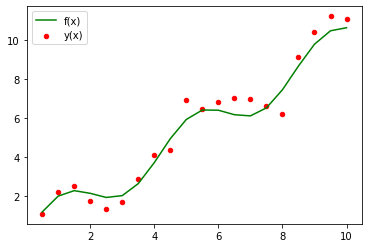

In [64]:
fig = plt.figure()

axes = fig.add_subplot(1, 1, 1)
axes.scatter(x, y_values, s = 20, c = 'r', marker = 'o', label = 'y(x)')
axes.plot(x, f_values, c = 'g', label = 'f(x)')

plt.legend(loc = 'upper left')
plt.show()

<h2> Solution 2.3 </h2>

In [65]:
# Corresponding to g1(x), g3(x), g10(x) estimators
polynomial_degrees = [1, 3, 10]  
POLYNOMIAL_DEGREE_COLORS = ['yellow', 'blue', 'gray']

# Set the domain of the x variable to be [1, 20]
x_grid = np.linspace(1, 10, 20)

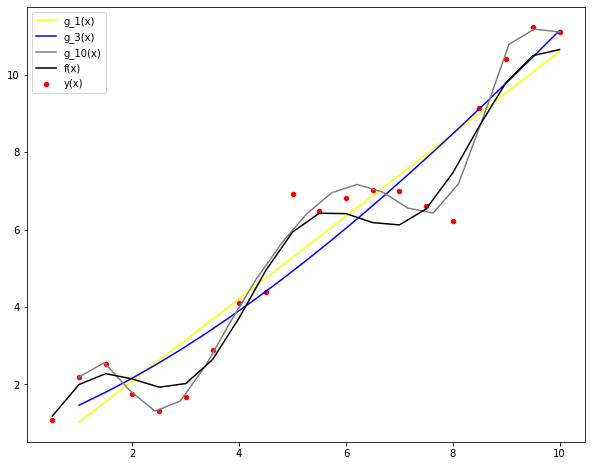

In [66]:
fig = plt.figure(figsize = (10, 8))
axes = fig.add_subplot(1, 1, 1)
beta = {}
fit = {}

for idx, degree in enumerate(polynomial_degrees):
    beta[degree] = np.polyfit(x, y_values, degree)
    fit[degree] = np.polyval(beta[degree], x_grid)
    axes.plot(x_grid, fit[degree], 
              c = POLYNOMIAL_DEGREE_COLORS[idx], label = f"g_{degree}(x)")

axes.plot(x, f_values, c = 'black', label = 'f(x)')
axes.scatter(x, y_values, s = 20, c = 'r', marker = 'o', label = 'y(x)')

plt.legend(loc = 'upper left')
plt.show()

<div style="color:blue">
<p>As you can see above, we have estimated the coefficients for each of the three estimators and have also plotted the y(x), f(x), and three estimators with degrees 1, 3 and 10 respectively. For the estimators: </p>
<ol>
    <li>g1(x): This estimator provides a poor fit to the observed data, here y(x), as well as poor approximation to the function f(x) which is represented by a black curve above. So, this estimator is basically "underfitting". As underfitting occurs when an estimator g(x) is not flexible enough to capture the underlying trends in the observed data, this shows us that this estimator is underfitting.</li>
    <li>g3(x): This estimator provides a little fitting to the observed data and does a better job at approximating f(x) as compared to g1(X), so, this seems to be a better fit to the data in comparison to g1(x). But still, it's quite far off from the actual observed data and the function f(x) thus, it seems that this estimator will also underfit. As it's not enough to capture the underlying trends in the observed data quite well, this lucidly shows us that the estimator is underfitting. However, it might be arguable whether this is not a conclusive result and maybe it fits the data quite well in comparison to other estimators but with the data provided and the plot provided, this seems to be the case that the estimator is underfitting. (maybe you can also call it inconclusive!)</li>
    <li>g10(x): This estimator provides a very accurate fit to some of the observed data points and also fits f(x) very nicely but as it fits the observed data points with great precision so, it wouldn't be very flexible when new data would be added to the dataset. This is a classical example of overfitting. Precisely, overfitting occurs when an estimator is too flexible, allowing to capture illusory trends or noise in the data which it's doing quite strongly here. So, this estimator is overfitting the data.</li> 
</ol>
</div>

<h2> Solution 2.4 </h2>

In [67]:
def error_function(pred, actual):
    return (pred - actual) ** 2

In [69]:
from collections import defaultdict

# Constants
num_records_per_dataset = 50
num_datasets = 100
max_polynomial_degree = 15
model_polynomial_degrees = range(1, max_polynomial_degree + 1)

NOISE_STD = np.sqrt(0.3)
train_data_percent = 0.8
num_train_data = int(np.ceil(num_records_per_dataset*train_data_percent))

# Creating training and testing inputs
x = np.linspace(0, 10, num_records_per_dataset)
x = np.random.permutation(x)
x_train_data = x[:num_train_data]
x_test_data = x[num_train_data:]
x_train_data.sort()
x_test_data.sort()

# Logging Variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Looping over datasets to calculate theta for different polynomial degrees
for dataset in range(num_datasets):
    
    # Simulate training and testing targets
    y_train_data = [func_of(x_data) for x_data in x_train_data] + \
                    NOISE_STD * np.random.randn(*x_train_data.shape)
    y_test_data = [func_of(x_data) for x_data in x_test_data] + \
                    NOISE_STD * np.random.randn(*x_test_data.shape)
    
    # Loop over model complexities or degrees
    for degree in model_polynomial_degrees:
        # Train Model -> Fitting to the dataset provided
        temp_theta_hat = np.polyfit(x_train_data, y_train_data, degree)
        theta_hat[degree].append(temp_theta_hat)
        
        # Make predictions on the training set
        temp_pred_train = np.polyval(temp_theta_hat, x_train_data)
        pred_train[degree].append(temp_pred_train)
        
        # Make predictions on the test set
        temp_pred_test = np.polyval(temp_theta_hat, x_test_data)
        pred_test[degree].append(temp_pred_test)
        
        # Compute MSE for for Training and Testing sets
        train_errors[degree].append(np.mean(error_function(
                                            temp_pred_train, y_train_data)))
        test_errors[degree].append(np.mean(error_function(
                                            temp_pred_test, y_test_data)))

In [10]:
def calc_estimator_variance(predictions_for_test_data):
    predictions_for_test_data = np.array(predictions_for_test_data)
    average_model_prediction = predictions_for_test_data.mean(0)
    
    return np.mean((predictions_for_test_data - average_model_prediction)**2)

def calc_estimator_bias_squared(predictions_for_test_data):
    predictions_for_test_data = np.array(predictions_for_test_data)
    average_model_prediction = predictions_for_test_data.mean(0)
    
    return np.mean((average_model_prediction - func_of(x_test_data))**2)

In [70]:
train_errors_across_all_datasets = []
test_errors_across_all_datasets = []
bias_squared_values = []
variance_values = []

for degree in model_polynomial_degrees:
    train_errors_across_all_datasets.append(np.mean(train_errors[degree]))
    test_errors_across_all_datasets.append(np.mean(test_errors[degree]))
    bias_squared_values.append(calc_estimator_bias_squared(pred_test[degree]))
    variance_values.append(calc_estimator_variance(pred_test[degree]))
    
best_model_degree = model_polynomial_degrees[np.argmin(
                    test_errors_across_all_datasets)]
print(f"The degree of the Best Model will be: {best_model_degree}")

The degree of the Best Model will be: 8


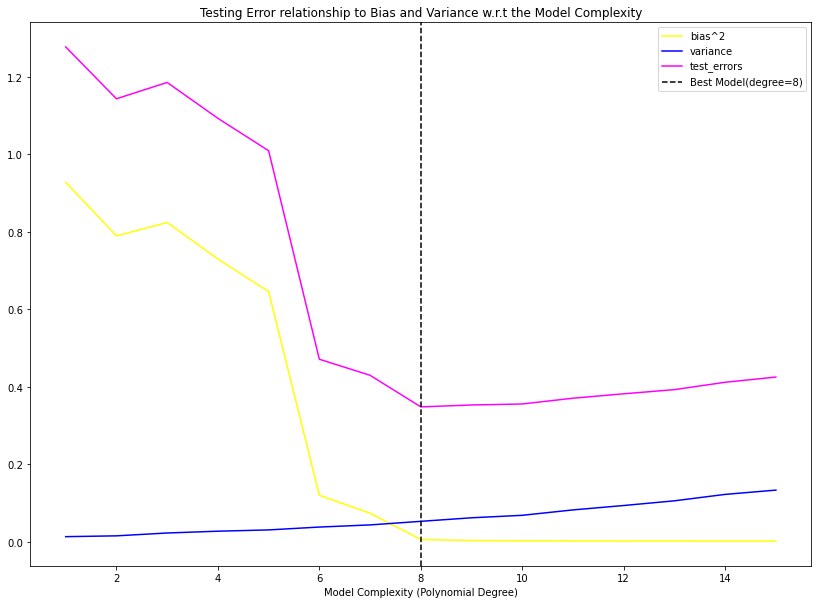

In [71]:
fig, axes = plt.subplots(1, 1, figsize = (14, 10))
plt.plot(model_polynomial_degrees, bias_squared_values, 
         color = 'yellow', label = 'bias^2')
plt.plot(model_polynomial_degrees, variance_values, 
         color = 'blue', label = 'variance')
plt.plot(model_polynomial_degrees, test_errors_across_all_datasets, 
         color = 'magenta', label = 'test_errors')
plt.axvline(best_model_degree, linestyle='--', 
            color='black', label=f'Best Model(degree={best_model_degree})')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.legend()
plt.title("Testing Error relationship to Bias and Variance " + \
          "w.r.t the Model Complexity")
plt.show()

<div style="color:blue">
    As you can see above, the graph clearly shows us that the bias-squared is decreasing with increasing the model complexity and the variance is increasing with increasing the model complexity, both of them cross paths somewhere in between the model complexities of 7 and 8 (polynomial degrees) and as the minimum testing error is at the 8 polynomial degree model, I have taken the best model to be the one which is a 8-polynomial model.
</div>

<h2> Solution 2.5 </h2>

In [46]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
import numpy as np
import warnings
warnings.filterwarnings("ignore")

np.random.seed(576)

num_records_per_dataset = 50
num_datasets = 100

NOISE_STD = np.sqrt(0.3)
train_data_percent = 0.8
num_train_data = int(np.ceil(num_records_per_dataset*train_data_percent))

# Creating training and testing inputs
x = np.linspace(0, 10, num_records_per_dataset)
x = np.random.permutation(x)
x_train_data = x[:num_train_data]
x_test_data = x[num_train_data:]
x_train_data.sort()
x_test_data.sort()

In [78]:
mse_ridge = []
bias_ridge = []
var_ridge = [] 

theta_hat = []
pred_train = []
pred_test = []
test_errors = []

for dataset in range(num_datasets):
    
    # Simulate training and testing targets
    y_train_data = [func_of(x_data) for x_data in x_train_data] + \
                    NOISE_STD * np.random.randn(*x_train_data.shape)
    y_test_data = [func_of(x_data) for x_data in x_test_data] + \
                    NOISE_STD * np.random.randn(*x_test_data.shape)
    

    poly = PolynomialFeatures(10)
    train_features = poly.fit_transform(x_train_data.reshape(-1, 1))
    test_features = poly.fit_transform(x_test_data.reshape(-1, 1))
    
    model = Ridge(alpha = 1)
    mse, bias, var = bias_variance_decomp(model, train_features, 
                                          y_train_data.flatten(),
                                          test_features, 
                                          y_test_data.flatten(), 
                                          loss='mse', \
                                          num_rounds = 100, 
                                          random_seed = 576)
    mse_ridge.append(mse)
    bias_ridge.append(bias)
    var_ridge.append(var)
    
    # 10-Degree Polynomial
    # Train Model -> Fitting to the dataset provided
    temp_theta_hat = np.polyfit(x_train_data, y_train_data, 10)
    theta_hat.append(temp_theta_hat)
        
    # Make predictions on the training set
    temp_pred_train = np.polyval(temp_theta_hat, x_train_data)
    pred_train.append(temp_pred_train)
        
    # Make predictions on the test set
    temp_pred_test = np.polyval(temp_theta_hat, x_test_data)
    pred_test.append(temp_pred_test)
        
    # Compute MSE for Testing sets
    test_errors.append(np.mean(error_function(
                                temp_pred_test, y_test_data)))
    
avg_mse_ridge = np.mean(mse_ridge)
avg_bias_ridge = np.mean(bias_ridge)
avg_var_ridge = np.mean(var_ridge)

mse_test_error_10_degree = np.mean(test_errors)
bias_squared_value_10_degree = calc_estimator_bias_squared(pred_test)
variance_value_10_degree = calc_estimator_variance(pred_test)

In [79]:
print("Ridge (with L-2 regularization) Model: ")
print(f"Average MSE = {avg_mse_ridge}")
print(f"Average Bias = {avg_bias_ridge}")
print(f"Average Variance = {avg_var_ridge}")
print()
print("10-Degree Polynomial Model: ")
print(f"Average MSE = {mse_test_error_10_degree}")
print(f"Average Bias = {bias_squared_value_10_degree}")
print(f"Average Variance = {variance_value_10_degree}")

Ridge (with L-2 regularization) Model: 
Average MSE = 0.4360717372176708
Average Bias = 0.36428329661279046
Average Variance = 0.07178844060488015

10-Degree Polynomial Model: 
Average MSE = 0.339425354842713
Average Bias = 0.0007682630888213424
Average Variance = 0.07006147059752323


<div style="color:blue">
    As you can see above, the Mean-Squared Error (MSE) is greater for the Ridge Model, which has L2 regularization applied, than the 10-Degree Polynomial Model. Also, the bias is greater for the Ridge Model when compared to the 10-Degree Polynomial Model.
    <br>
    Using this data, we might say that 10-Degree Polynomial Model is in or near the Overfitting region, as the MSE is quite less as compared to the model with L2 Regularization, but if we take some insight from the the previous question and the graph showing the complexities of the model and the MSEs related to it, we can see that this model nearly qualifies to be in the overfitting region and is very close to the best model defined there. 
    <br>
    When we combine this insight with the MSE for Ridge Model (L2 regularization) which has large MSE, it seems that the Ridge Model is either underfitting or overfitting the dataset and that when collated with the fact that it has quite large Bias as compared to the 10-Degree Polynomial Model, it seems that model with L2 Regularization is underfitting the data. 
</div>

<h2> Problem 3 - OpenML, Algorithmic Performance Scaling </h2>

<h2> Solution 3.1 </h2>

<div style="color:blue">
    I have taken 2 datasets:
    <ol>
        <li>
            Credit Score - Good or Bad:<br>
            - Number of features: 21<br>
            - Number of instances: 1000<br>
            - Number of classes: 2<br>
            - Number of Numerical Features: 7<br>
            - Number of Categorical Features: 13 (Excluding the Class feature which contains the labels)<br>
            <br>
        </li>
        <li>
            Popular Kids Goals - Sports, Popular or Study:<br>
            - Number of features: 11<br>
            - Number of instances: 478<br>
            - Number of classes: 3<br>
            - Number of Numerical Features: 6<br>
            - Number of Categorical Features: 4 (Excluding the Goals feature which contains the labels)<br>
        </li>
    </ol>
</div>    

<h2> Solution 3.2 </h2>

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import time
np.random.seed(576)

def read_data_from_csv(csv_file_name):
    dataset = pd.read_csv(csv_file_name)
    return dataset

def preprocess_data(data_df, label_feature_name, label_map):
    dataset_num_cols = list(data_df._get_numeric_data().columns)
    dataset_categ_cols = list(set(data_df.columns) - set(dataset_num_cols))
    dataset_categ_cols.remove(label_feature_name)
    
    dataset_onehot_df = pd.get_dummies(data_df, 
                                       columns = dataset_categ_cols, 
                                       prefix='onehot_')
    dataset_onehot_df[label_feature_name] = \
    dataset_onehot_df[label_feature_name].replace(label_map)
    
    return dataset_onehot_df

def split_data(preprocessed_data_df, label_feature_name):
    y = preprocessed_data_df[label_feature_name]
    X = preprocessed_data_df.drop(labels = [label_feature_name], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.2, 
                                                        random_state=123)
    
    return X_train, X_test, y_train, y_test

def get_fraction_of_train_data(X_train, y_train, 
                               label_feature_name, fraction = 1.0):
    y_train.reset_index(drop=True, inplace=True)
    X_train[label_feature_name] = y_train.values
    frac_data_df = X_train.sample(frac = fraction, axis=0)
    y_train_frac = frac_data_df.iloc[:,-1:]
    X_train_frac = frac_data_df.iloc[:,:-1]
    
    return X_train_frac, y_train_frac[label_feature_name]
    
def fit_to_random_forest_classifier_model(X_train, y_train, 
                                          X_test, y_test, num_estimators):
    model_clf = RandomForestClassifier(n_estimators = num_estimators)
    
    start = time.time()
    model_clf.fit(X_train, y_train)
    end = time.time()
    time_elapsed = end - start
    
    y_pred = model_clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return accuracy, time_elapsed

def fit_to_gradient_boosting_classifier(X_train, y_train, 
                                        X_test, y_test, num_estimators, lr):
    model_clf = GradientBoostingClassifier(n_estimators = num_estimators, 
                                           learning_rate = lr)
    
    start = time.time()
    model_clf.fit(X_train, y_train)
    end = time.time()
    time_elapsed = end - start
    
    y_pred = model_clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return accuracy, time_elapsed

def create_learning_curve(rf_clf_acc, gb_clf_acc, dataset_name):
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))
    plt.plot(list(rf_clf_acc.keys()), list(rf_clf_acc.values()), 
             color = 'yellow', label = 'Random Forest')
    plt.plot(list(gb_clf_acc.keys()), list(gb_clf_acc.values()), 
             color = 'blue', label = 'Gradient Boosting')
    plt.xlabel("Fraction of the Training Dataset")
    plt.ylabel("Accuracy of the Models")
    plt.legend()
    plt.title(f"Accuracy vs. Training Dataset Curve " + \
              "(Learning Curve) for Dataset: {dataset_name}")
    plt.show()

def create_time_chart(rf_clf_times, gb_clf_times, dataset_name):
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))
    plt.plot(list(rf_clf_times.keys()), list(rf_clf_times.values()), 
             color = 'red', label = 'Random Forest')
    plt.plot(list(gb_clf_times.keys()), list(gb_clf_times.values()), 
             color = 'green', label = 'Gradient Boosting')
    plt.xlabel("Fraction of the Training Dataset")
    plt.ylabel("Wall Time of the Models")
    plt.legend()
    plt.title(f"Wall Time vs. Training Dataset Curve for Dataset: " + \
              "{dataset_name}")
    plt.show()

def run_models(csv_fn_data_1, csv_fn_data_2, 
               label_feature_name_1, label_feature_name_2, 
               rf_num_estimators, gb_num_estimators,
               lr_gb_1, lr_gb_2):
    df_1 = read_data_from_csv(csv_fn_data_1)
    df_2 = read_data_from_csv(csv_fn_data_2)
    
    preprocessed_data_df_1 = preprocess_data(df_1, label_feature_name_1, 
                                             {"good": 1, "bad": 0})
    preprocessed_data_df_2 = preprocess_data(df_2, label_feature_name_2,
                                    {"Sports": 0, "Popular": 1, "Grades": 2})
    
    X_train_1, X_test_1, y_train_1, y_test_1 = \
    split_data(preprocessed_data_df_1, label_feature_name_1)
    X_train_2, X_test_2, y_train_2, y_test_2 = \
    split_data(preprocessed_data_df_2, label_feature_name_2)
    
    random_forest_clf_data_1_acc = dict()
    random_forest_clf_data_1_times = dict()
    random_forest_clf_data_2_acc = dict()
    random_forest_clf_data_2_times = dict()
    
    gradient_boosting_clf_data_1_acc = dict()
    gradient_boosting_clf_data_1_times = dict()
    gradient_boosting_clf_data_2_acc = dict()
    gradient_boosting_clf_data_2_times = dict()
    
    for frac in range(1, 11, 1):
        frac_in_decimals = frac/10.0
        X_train_1_frac, y_train_1_frac = \
        get_fraction_of_train_data(X_train_1, y_train_1, 
                                   label_feature_name_1, frac_in_decimals)
        X_train_2_frac, y_train_2_frac = \
        get_fraction_of_train_data(X_train_2, y_train_2, 
                                   label_feature_name_2, frac_in_decimals)
        # Random Forest Classifier for both the datasets and the fractions 
        # of the training datasets
        acc_1, time_elapsed_1 = fit_to_random_forest_classifier_model(
                                X_train_1_frac, y_train_1_frac, 
                                X_test_1, y_test_1, rf_num_estimators[0])
        acc_2, time_elapsed_2 = fit_to_random_forest_classifier_model(
                                X_train_2_frac, y_train_2_frac, 
                                X_test_2, y_test_2, rf_num_estimators[1])
        
        random_forest_clf_data_1_acc[frac_in_decimals] = acc_1
        random_forest_clf_data_1_times[frac_in_decimals] = time_elapsed_1
        random_forest_clf_data_2_acc[frac_in_decimals] = acc_2
        random_forest_clf_data_2_times[frac_in_decimals] = time_elapsed_2
        
        # Gradient Boosting Classifier for both the datasets and the 
        # fractions of the training datasets
        acc_1, time_elapsed_1 = fit_to_gradient_boosting_classifier(
                                X_train_1_frac, y_train_1_frac, 
                                X_test_1, y_test_1, gb_num_estimators[0], 
                                lr_gb_1)
        acc_2, time_elapsed_2 = fit_to_gradient_boosting_classifier(
                                X_train_2_frac, y_train_2_frac, 
                                X_test_2, y_test_2, gb_num_estimators[1], 
                                lr_gb_2)
        
        gradient_boosting_clf_data_1_acc[frac_in_decimals] = acc_1
        gradient_boosting_clf_data_1_times[frac_in_decimals] = time_elapsed_1
        gradient_boosting_clf_data_2_acc[frac_in_decimals] = acc_2
        gradient_boosting_clf_data_2_times[frac_in_decimals] = time_elapsed_2
    
    create_learning_curve(random_forest_clf_data_1_acc, 
                          gradient_boosting_clf_data_1_acc, csv_fn_data_1)
    create_learning_curve(random_forest_clf_data_2_acc, 
                          gradient_boosting_clf_data_2_acc, csv_fn_data_2)
    create_time_chart(random_forest_clf_data_1_times, 
                      gradient_boosting_clf_data_1_times, csv_fn_data_1)
    create_time_chart(random_forest_clf_data_2_times, 
                      gradient_boosting_clf_data_2_times, csv_fn_data_2)

### First set of 4 Graphs without Hyperparameter tuning

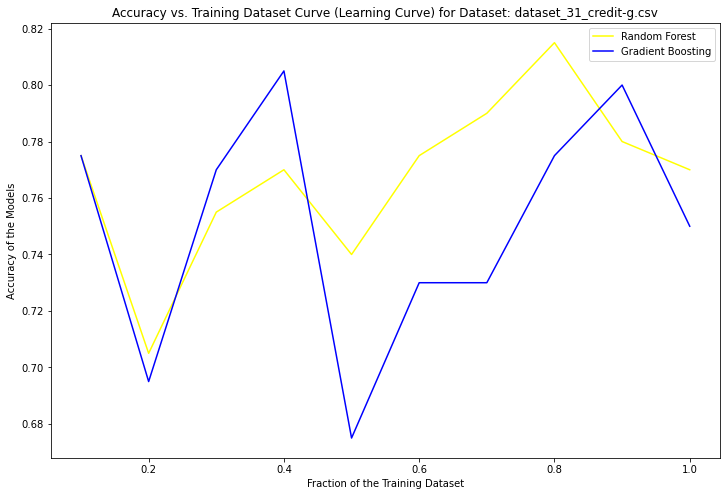

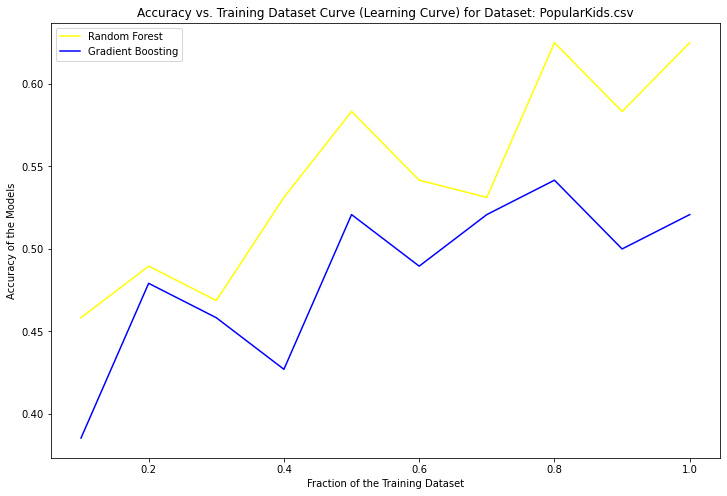

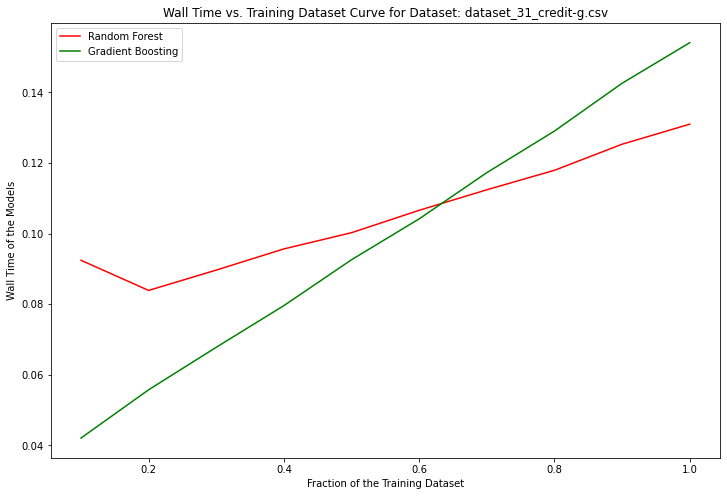

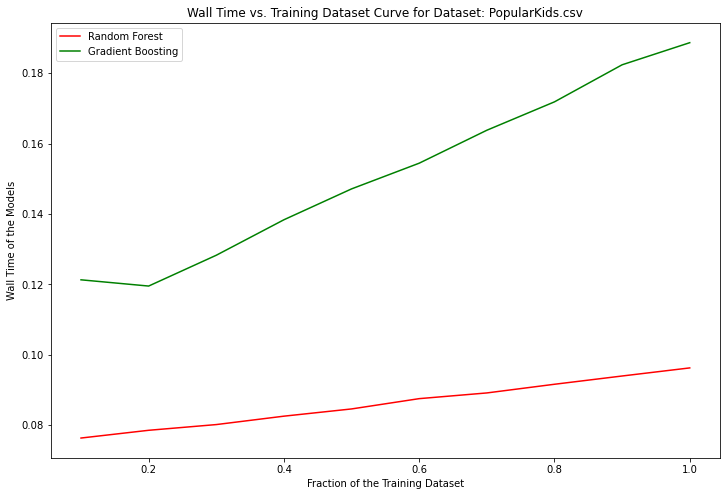

In [30]:
run_models('dataset_31_credit-g.csv', 'PopularKids.csv', 'class', 'Goals', \
           [125, 125], [125, 125], 1, 1)

### Second Set of 4 Graphs with Hyperparameter tuning 

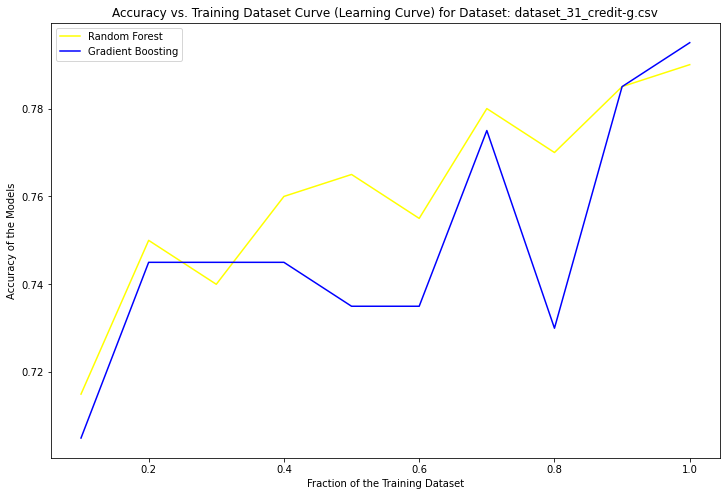

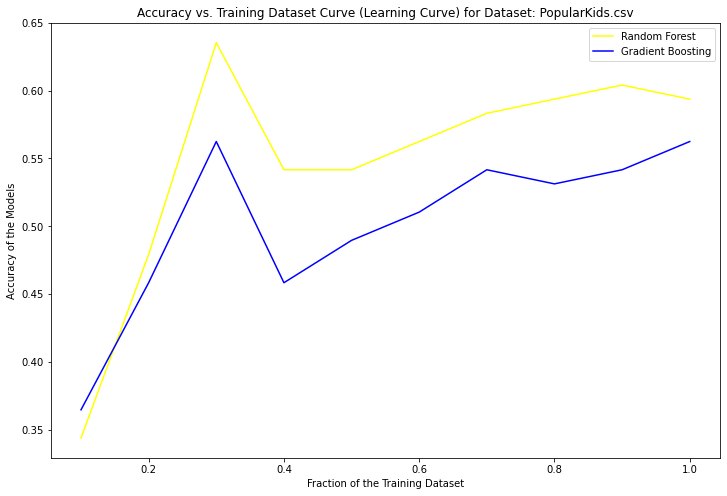

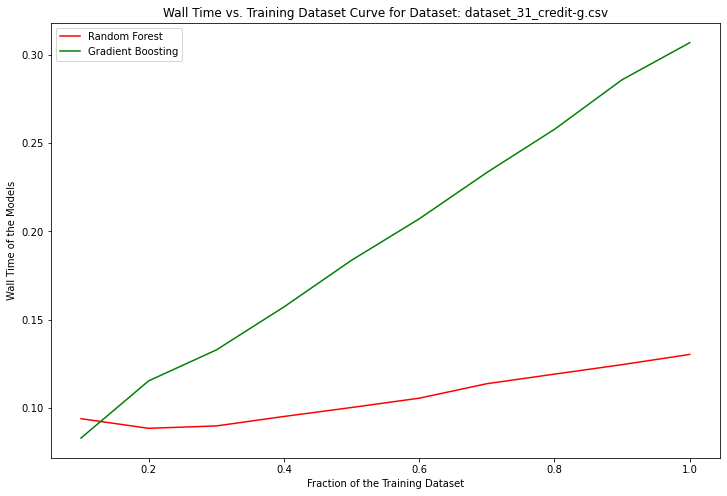

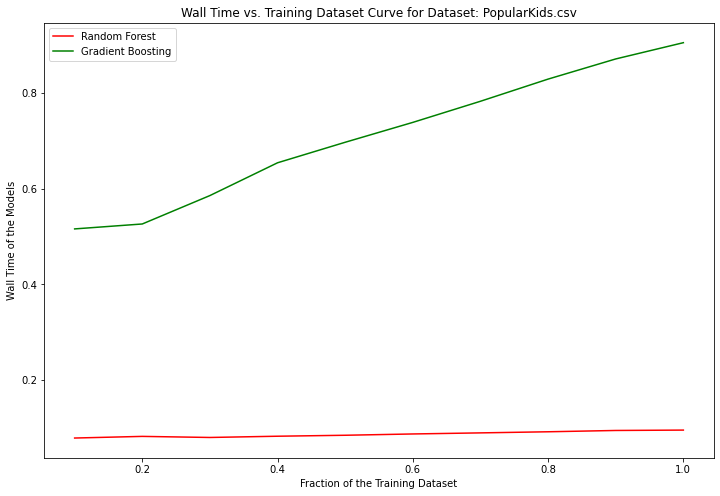

In [52]:
# Hyperparameter tuning done for GB CLassifier
run_models('dataset_31_credit-g.csv', 'PopularKids.csv', 'class', 'Goals', \
           [125, 125], [250, 600], 0.6, 0.8)

<h2> Solution 3.3 - This is w.r.t the 1st Set of 4 Graphs without hyperparameter tuning shown above.</h2>

<div style="color:blue">
    As you can see above, Random Forest Classifier gives better accuracy for both the datasets. There's quite a lot of difference between the accuracies for those models. In general, approximately, for most of the data points in the graph, the Random Forest Classifier has better accuracy than the Gradient Boosting Classifier.<br>
    Furthermore, the Gradient Boosting Classifer takes much more time to train when compared to the Random Forest Classifier for both the datasets. I agree that for the first dataset, the difference between the training times for both the classifiers is quite less where Gradient Boosting Classifier takes more time to train, but, the trainings times in general look larger for Gradient Boosting Classifier.<br>
    Now, let's go over the 3 main observations:
    <ol>
        <li>
            As can be seen in the "Accuracy" vs. "Training Dataset" graph, the accuracy for the Gradient Boosting Classifier increases very slowly for both the datasets when compared to the the accuracy increase for Random Forest Classifier. Moreover, the accuracy curve for the Gradient Boosting Classifier looks more volatile when compared to that of Random Forest Classifier. Gradient Boost Classifier has more spurts of going up and down in terms of accuracy while Random Forest Classifier's curves have more of an upward direction (some exceptions are there but those are very few). Also, it might seem from these 2 cases that Random Forest performs better as a classifier when compared to the Gradient Boosting Classifier. This is not the case though as when we tune the hyperparameters for Gradient Boosting Classifier, it's accuracy can get higher than that of the Random Forest Classifier. The accuracies that we see are a lot dependent on the hyperparameters entered for the models. (Suggested by the second set of graphs!) However, it's a marginal difference between the accuracies of the two in comparison to the training time increase for the Gradient Boosting Classifier! All these things depend a lot on the dataset, the number of features and instances in the dataset and the hyperparameters for the model.
        </li>
        <li>
            In the "Wall Time (Training Time)" vs. "Training Dataset size in terms of fraction of the total data", we can see that the training time increases at a faster rate for Gradient Boosting Classifier as compared to the Random Forest Classifier. As we can see the training time increases more or less linearly for both the models but with a greater slope for Gradient Boosting Classifier. As the rate of increase of wall time is greater for Gradient Boosting Classifier, thus, we would generally see a greater training time with Gradient Boosting Classifier for the same dataset as compared to the Random Forest Classifier. Also, as the accuracy score for the Gradient Boosting Classifier is not much in comparison to how much time more it takes to train in comparison to the Random Forest Classifier, it seems that with Random Forest Classifier we would get a better deal w.r.t the accuracy as well as the system requirements needed to run the model.
        </li>
        <li>
            In the "Wall Time (Training Time)" vs. "Training Dataset size in terms of fraction of the total data" for the 1st dataset, we can also see that at first the training time for Random Forest Classifier is greater than that of Gradient Boosting Classifier when only 10% of the total training data available is taken for training. This might be primarily because of the reason the way Random Forest Classifier works. Random Forest Classifier is based on decision trees and decision trees need to be formed for some rules even when the dataset is less and then mostly, the trees need to be built upon by pruning or adding some nodes. That's also the reason for low rate of increase of wall time for decision trees. However, Gradient Boosting doesn't work this way and has to adjust a lot more parameters when new data is added which seems like iterative changes on the model being trained. Then why this doesn't happen in the second dataset? I would say that this would still happen but as the number of features for 2nd dataset (11) is quite less than that of the 1st dataset (21) and as the number of instances in the 2nd dataset is less than half of the number of instances in the 1st dataset, the rules being made in the decision trees would be less in comparison. If you look more closely, we can also find that as the gradient boosting works on the weak classifier modeling, so, the less number of instances in the 2nd dataset would mean that the gradient boosting will try to learn a lot even with the 10% of the training data available (that's why it starts with a high wall time in the graph shown above) thus, also increasing the probability of overfitting the data.  
        </li>
    </ol>
</div>

<h2> Problem 4 - Precision, Recall, ROC </h2>

<h2> Solution 4.1 </h2>

<div style="color:blue">
    No, the true negatives (TN) doesn't matter for both the ROC and PR curves. It only matters for ROC curve actually. <br>
    Basically, ROC curve is a true positive rate (TPR) vs. false positive rate (FPR) curve with true positive rate on the y-axis and false positive rate on the x-axis. On the other hand, PR curve is a precision vs. recall curve with precision on the y-axis and recall on the x-axis. Please see the formulas for these parameters below:<br>
    $$
    Precision = \frac{TP}{(TP + FP)}, 
    Recall = \frac{TP}{(TP + FN)}
    $$
    $$
    FPR = \frac{FP}{(FP + TN)}, 
    TPR = \frac{TP}{(TP + FN)}
    $$
    So, we use true positives (TP), false positives (FP) and false negatives (FN) for the PR curve and true positives (TP), false positives (FP),  false negatives (FN), and true negatives (TN) for the ROC curve.<br>
    Why each point on ROC curve corresponds to a unique point on the PR curve?
    By the formulas for the FPR and TPR, we can see that when we plot these on the ROC curve, then each point on the plot will correspond to a unique confusion matrix with all the values TP, FP, FN and TN when the dataset has been fixed.<br>
    On the other hand, when we see the precision and recall values, we see that we have all the values in a confusion matrix but not TN. So, some might question that each point in the PR curve can correspond to multiple confusion matrices. But, that's not true because, with a fixed number of positive and negative samples, given the other 3 entries in the confusion matrix, TN can be uniquely determined.<br>
</div>

![Confusion Matrix](ConfusionMatrix.png)

<div style="color:blue">
    Consequently, we will have one-to-one mapping from between confusion matrices and points in the PR space. This implies by the aforementioned argument that we also have a one-to-one mapping between points (each defined by a confusion matrix) in ROC space and PR space.<br>
    There is one condition however, that is an exception to the above rule! When Recall = 0, we will be unable to recover FP and thus, cannot find a unique confusion matrix. However other than that, it is a proven fact that each point (correponds to a unique confusion matrix) on a ROC curve corresponds to a unique point on the PR curve.<br>
</div>

<h2> Solution 4.2 </h2>

In [53]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import time
np.random.seed(576)

def read_data_from_csv(csv_file_name):
    dataset = pd.read_csv(csv_file_name)
    return dataset

def preprocess_data(data_df, label_feature_name, label_map):
    dataset_num_cols = list(data_df._get_numeric_data().columns)
    dataset_categ_cols = list(set(data_df.columns) - set(dataset_num_cols))
    dataset_categ_cols.remove(label_feature_name)
    
    dataset_onehot_df = pd.get_dummies(data_df, 
                                       columns = dataset_categ_cols, 
                                       prefix='onehot_')
    dataset_onehot_df[label_feature_name] = \
    dataset_onehot_df[label_feature_name].replace(label_map)
    
    return dataset_onehot_df

def split_data(preprocessed_data_df, label_feature_name):
    y = preprocessed_data_df[label_feature_name]
    X = preprocessed_data_df.drop(labels = [label_feature_name], 
                                  axis = 1)
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state=123)
    
    return X_train, X_test, y_train, y_test
    
def fit_to_adaboost_model(X_train, y_train, 
                          X_test, y_test, num_estimators, lr):
    model_clf = AdaBoostClassifier(n_estimators = num_estimators, 
                                   learning_rate=lr)
    model_clf.fit(X_train, y_train)
    y_pred = model_clf.predict(X_test)
    proba = model_clf.predict_proba(X_test)
    preds = proba[:,1]
    
    fpr,tpr,_ = metrics.roc_curve(y_test, preds)
    precision, recall,_ = metrics.precision_recall_curve(y_test, preds)

    return fpr, tpr, precision, recall, preds, y_pred

def fit_to_logistic_regression_model(X_train, y_train, X_test, y_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model_clf = LogisticRegression()  
    model_clf.fit(X_train, y_train)  
    y_pred = model_clf.predict(X_test) 
    proba = model_clf.predict_proba(X_test)
    preds = proba[:,1]
    
    fpr,tpr,_ = metrics.roc_curve(y_test, preds)
    precision, recall,_ = metrics.precision_recall_curve(y_test, preds)
    
    return fpr, tpr, precision, recall, preds, y_pred

def create_roc_curves(fpr_ada, tpr_ada, fpr_logreg, tpr_logreg):
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))
    plt.plot(fpr_ada, tpr_ada, color = 'red', label = 'AdaBoost')
    plt.plot(fpr_logreg, tpr_logreg, 
             color = 'blue', label = 'Logistic Regression')
    plt.plot([0, 1], [0, 1], color='black', 
             linestyle='dashed', label = "All Positive Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    plt.legend()
    plt.title(f"FPR vs. TPR (ROC Curve)")
    plt.show()

def create_pr_curves(prec_ada, recall_ada, prec_logreg, recall_logreg):
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))
    plt.plot(recall_ada, prec_ada, 
             color = 'yellow', label = 'AdaBoost')
    plt.plot(recall_logreg, prec_logreg, 
             color = 'magenta', label = 'Logistic Regression')
    plt.plot([0, 1], [1, prec_logreg[0]], color='black', 
             linestyle='dashed', label = 'All Positive Classifier')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.title(f"Precision Recall Curve")
    plt.show()

def run_models_for_a_dataset(csv_fn_data, label_feature_name):
    df = read_data_from_csv(csv_fn_data)
    
    preprocessed_data_df = preprocess_data(df, label_feature_name, 
                                           {"good": 1, "bad": 0})
    
    X_train, X_test, y_train, y_test = split_data(preprocessed_data_df, 
                                                  label_feature_name)
    fpr_ada, tpr_ada, prec_ada, recall_ada, preds_ada, y_preds_ada = \
    fit_to_adaboost_model(X_train, y_train, X_test, y_test, 400, 0.1)
    fpr_logreg, tpr_logreg, prec_logreg, \ 
    recall_logreg, preds_logreg, y_preds_logreg = \
    fit_to_logistic_regression_model(X_train, y_train, X_test, y_test)
    
    create_roc_curves(fpr_ada, tpr_ada, fpr_logreg, tpr_logreg)
    create_pr_curves(prec_ada, recall_ada, prec_logreg, recall_logreg)
    
    return y_test, preds_ada, preds_logreg, y_preds_ada, y_preds_logreg
    

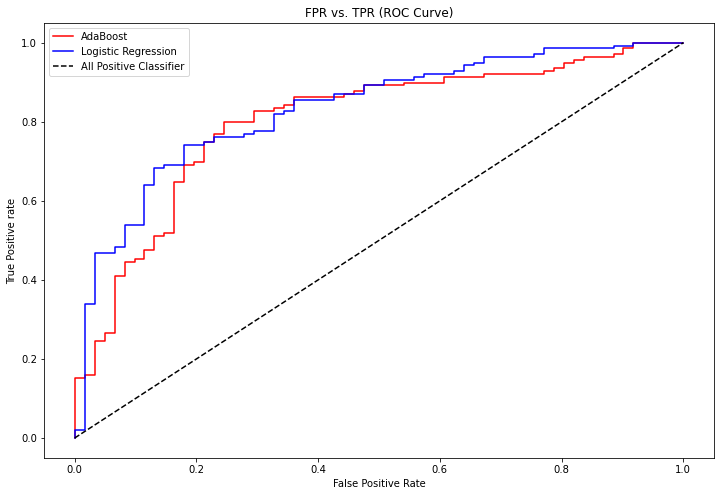

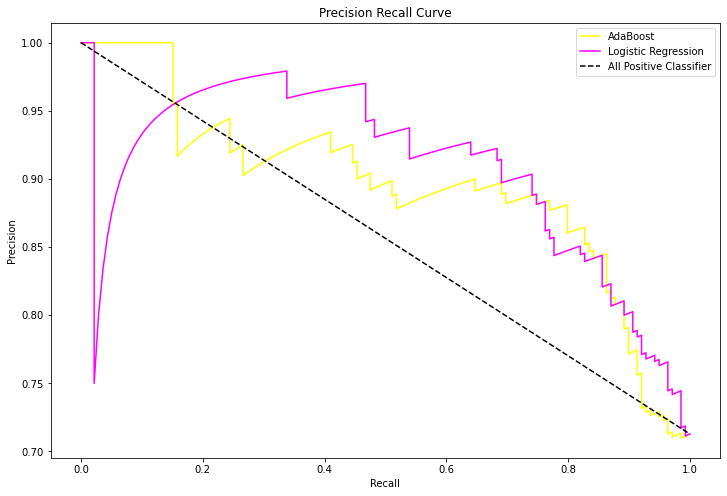

In [2]:
y_test, preds_ada, preds_logreg, y_preds_ada, y_preds_logreg = \
run_models_for_a_dataset('dataset_31_credit-g.csv', 'class')

<h2> Solution 4.3 </h2>

In [3]:
# ROC Curve Creation from Scratch
def compute_confusion_matrix_vars(threshold_vector, y_test):
    true_positives = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negatives = np.equal(threshold_vector, 0) & np.equal(y_test, 1)
    false_positives = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negatives = np.equal(threshold_vector, 0) & np.equal(y_test, 1)
    
    return true_positives, true_negatives, false_positives, false_negatives

def compute_rates_for_roc(true_positives, true_negatives, 
                          false_positives, false_negatives):
    tpr = true_positives.sum() / \
            (true_positives.sum() + false_negatives.sum())
    fpr = false_positives.sum() / \
            (false_positives.sum() + true_negatives.sum())
    
    return tpr, fpr

def roc_params(probs, y_test, partitions = 100):
    roc = np.array([])
    for idx in range(partitions + 1):
        threshold_vector = np.greater_equal(probs, 
                                            idx / partitions).astype(int)
        tps, tns, fps, fns = compute_confusion_matrix_vars(threshold_vector, 
                                                           y_test)
        tpr, fpr = compute_rates_for_roc(tps, tns, fps, fns)
        roc = np.append(roc, [fpr, tpr])
    
    return roc.reshape(-1, 2)

def compute_area_under_roc(probs, y_test, partitions = 100):
    roc = roc_params(probs, y_test, partitions)
    fpr, tpr = roc[:, 0], roc[:, 1]
    area = 0
    
    for partition_num in range(partitions):
        area = area + (fpr[partition_num] - fpr[partition_num + 1]) * \
                tpr[partition_num]
    
    return area

def draw_roc_curves_with_area(y_test, preds_ada, preds_logreg):
    roc_ada = roc_params(preds_ada, y_test, 100000)
    roc_logreg = roc_params(preds_logreg, y_test, 100000)
    fpr_ada, tpr_ada = roc_ada[:, 0], roc_ada[:, 1]
    fpr_logreg, tpr_logreg = roc_logreg[:, 0], roc_logreg[:, 1]
    area_ada = compute_area_under_roc(preds_ada, y_test, 100000)
    area_logreg = compute_area_under_roc(preds_logreg, y_test, 100000)
    
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))
    plt.plot(fpr_ada, tpr_ada, color = 'red', label = 'AdaBoost')
    plt.plot(fpr_logreg, tpr_logreg, 
             color = 'blue', label = 'Logistic Regression')
    plt.fill_between(fpr_ada, tpr_ada, 
                     color = 'red', alpha = 0.4)
    plt.fill_between(fpr_logreg, tpr_logreg, 
                     color = 'blue', alpha = 0.4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    plt.legend()
    plt.title(f"ROC Curve with AUROC for AdaBoost = {area_ada} and " + \
              "AUROC for LogisticRegression = {area_logreg}")
    plt.show()


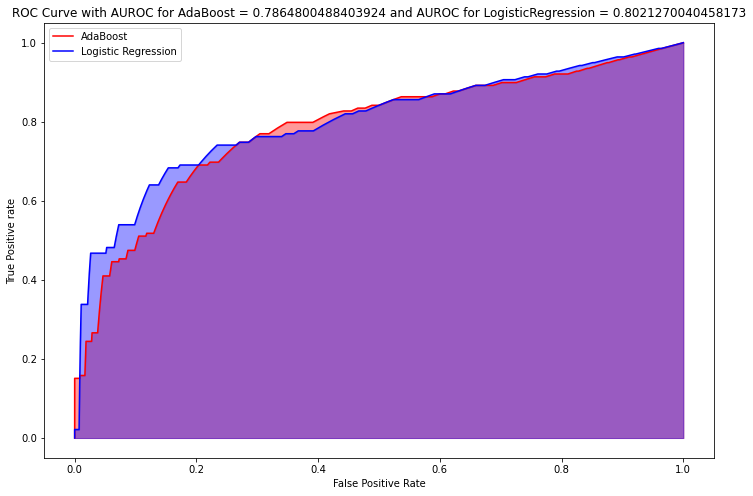

In [4]:
draw_roc_curves_with_area(y_test, preds_ada, preds_logreg)

In [5]:
# PR Curve Creation from Scratch
def compute_vars_for_pr(true_positives, true_negatives, 
                        false_positives, false_negatives):
    if (true_positives.sum() + false_negatives.sum()) != 0:
        recall = true_positives.sum() / \
                (true_positives.sum() + false_negatives.sum())
    else:
        recall = 0
    if (true_positives.sum() + false_positives.sum()) != 0:
        precision = true_positives.sum() / \
                    (true_positives.sum() + false_positives.sum())
    else:
        precision = 0
    
    return precision, recall

def pr_params(probs, y_test, partitions = 100):
    pr = np.array([])
    for idx in range(partitions + 1):
        threshold_vector = np.greater_equal(probs, 
                                            idx / partitions).astype(int)
        tps, tns, fps, fns = compute_confusion_matrix_vars(threshold_vector, 
                                                           y_test)
        precision, recall = compute_vars_for_pr(tps, tns, fps, fns)
        pr = np.append(pr, [recall, precision])
    
    return pr.reshape(-1, 2)

def compute_area_under_pr(probs, y_test, partitions = 100):
    pr = pr_params(probs, y_test, partitions)
    recall, precision = pr[:, 0], pr[:, 1]
    area = 0
    
    for partition_num in range(partitions):
        area = area + (recall[partition_num] - recall[partition_num + 1]) * \
                        precision[partition_num]
    
    return area

def draw_pr_curves_with_area(y_test, preds_ada, preds_logreg):
    pr_ada = pr_params(preds_ada, y_test, 100000)
    pr_logreg = pr_params(preds_logreg, y_test, 100000)
    recall_ada, precision_ada = pr_ada[:, 0], pr_ada[:, 1]
    recall_logreg, precision_logreg = pr_logreg[:, 0], pr_logreg[:, 1]
    area_ada = compute_area_under_pr(preds_ada, y_test, 100000)
    area_logreg = compute_area_under_pr(preds_logreg, y_test, 100000)
    
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))
    plt.plot(recall_ada, precision_ada, 
             color = 'red', label = 'AdaBoost')
    plt.plot(recall_logreg, precision_logreg, 
             color = 'blue', label = 'Logistic Regression')
    plt.fill_between(recall_ada, precision_ada, 
                     color = 'red', alpha = 0.4)
    plt.fill_between(recall_logreg, precision_logreg, 
                     color = 'blue', alpha = 0.4)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim(0.6, 1.01)
    plt.legend()
    plt.title(f"PR Curve with AUPR for AdaBoost = {area_ada} and " + \
              "AUPR for LogisticRegression = {area_logreg}")
    plt.show()


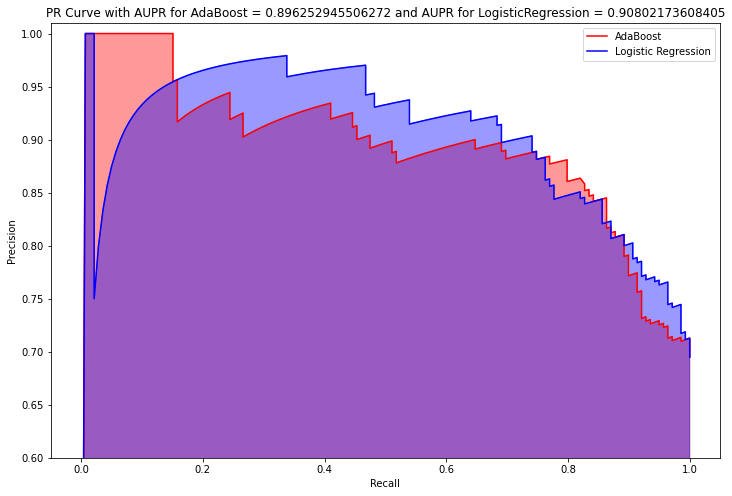

In [6]:
draw_pr_curves_with_area(y_test, preds_ada, preds_logreg)

In [7]:
# PR Gain Curve
def compute_prgain_vars(precisions, recalls, pi):
    prgain_prec = []
    prgain_recall = []
    
    for idx in range(len(precisions)):
        if (precisions[idx] >= pi and recalls[idx] >= pi):
            prgain_prec.append((precisions[idx] - pi)/\
                               ((1 - pi) * precisions[idx]))
            prgain_recall.append((recalls[idx] - pi)/\
                                 ((1 - pi) * recalls[idx]))
    
    return prgain_prec, prgain_recall

def compute_pi(y_test, y_preds):
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_preds).ravel()
    return (tp + fn) / (tp + fp + tn + fn)


def compute_area_under_pr_gain(precision_gains, recall_gains):
    area = 0
    for idx in range(len(precision_gains) - 1):
        area = area + (recall_gains[idx] - recall_gains[idx + 1]) * \
                        precision_gains[idx]
    
    return area

         
def draw_pr_gain_curves_with_area(y_test, preds_ada, preds_logreg, 
                                  y_preds_ada, y_preds_logreg):
    pi_ada = compute_pi(y_test, y_preds_ada)
    prec_ada, recall_ada,_ = metrics.precision_recall_curve(y_test, 
                                                            preds_ada)
    prgain_prec_ada, prgain_recall_ada = \
    compute_prgain_vars(prec_ada, recall_ada, pi_ada)
    
    pi_logreg = compute_pi(y_test, y_preds_logreg)
    prec_logreg, recall_logreg,_ = \
    metrics.precision_recall_curve(y_test, preds_logreg)
    prgain_prec_logreg, prgain_recall_logreg = \
    compute_prgain_vars(prec_logreg, recall_logreg, pi_logreg)
    
    area_ada = compute_area_under_pr_gain(prgain_prec_ada, 
                                          prgain_recall_ada)
    area_logreg = compute_area_under_pr_gain(prgain_prec_logreg, 
                                             prgain_recall_logreg)
    
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))
    plt.plot(prgain_recall_ada, prgain_prec_ada, 
             color = 'red', label = 'AdaBoost')
    plt.plot(prgain_recall_logreg, prgain_prec_logreg, 
             color = 'blue', label = 'Logistic Regression')
    plt.fill_between(prgain_recall_ada, prgain_prec_ada, 
                     color = 'red', alpha = 0.4)
    plt.fill_between(prgain_recall_logreg, prgain_prec_logreg, 
                     color = 'blue', alpha = 0.4)
    plt.xlabel("Recall Gain")
    plt.ylabel("Precision Gain")
    plt.legend()
    plt.title(f"PR Curve with AUPRG for AdaBoost = {area_ada} and " + \
              "AUPRG for LogisticRegression = {area_logreg}")
    plt.show()


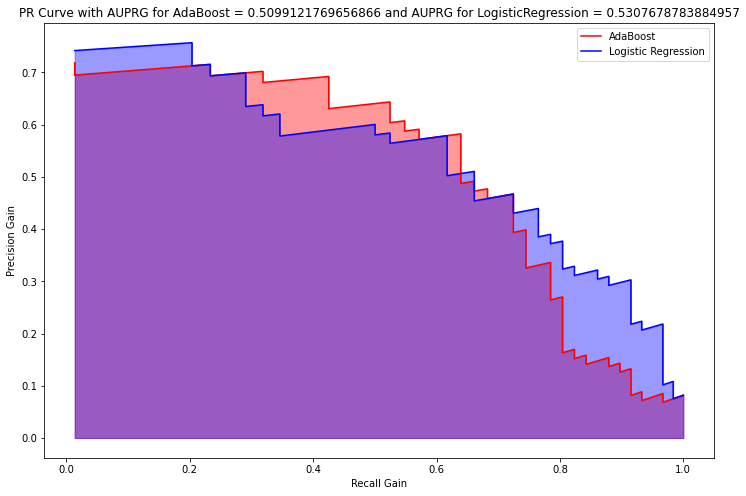

In [8]:
draw_pr_gain_curves_with_area(y_test, preds_ada, preds_logreg, 
                              y_preds_ada, y_preds_logreg)

<div style="color:blue">
    Yes, I agree with the conclusions of the NIPS paper that practitioners used use PR Gain curves rather than PR curves!<br>
    Firstly, it completely seems sound to me that any artithematic averaging of the values like precision, recall and f-values is fundamentally wrong as the precision, recall and f-values are expressed on a harmonic scale and thus, should be treated as such. Following this, it also empirically shows that for most of the cases, the AUPR (or AUROC) is quite different from AUPRG, so, they might be related quantitites but they are all significantly different. This we can see from the curves for all the ROC, PR and PRG and the area under those curves! The AUROC and AUPR differ and the AUPRG differs a lot from AUPR, which kind of enforces the empirical data in the paper.<br>
    Secondly, as we take all the values ranging between pi and 1 for the precision recall gain curve, it takes into  account of the F-gain score which is actually a better representation of the data as we only take the data that actually impacts our results which is over the all-positive classifier line. Using this, we enforce that we use a proper baseline and that the averaging is done on an appropriate scale. This also makes the performance assessment easier in comparison to AUPR or AUROC. <br>
    So, I completely agree that we should use AUPRG curve more as that is a better representation of the performance and also matches up with f score pretty nicely. This, in turn will also make the performance assessment task a little bit easier and more streamlined which is always a good thing!
</div>

# <h1><center>END of Assignment - Chandan Suri - CS4090 </center></h1>